# Prepare raw data for curvecurator

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp
from Bio.ExPASy import cellosaurus
from drevalpy.datasets.curvecurator import _exec_curvecurator, postprocess

## Load Data

In [2]:
RAW_FILE_PATH = Path("raw/NIHMS361223-supplement-4.xlsx")

In [3]:
overview_df = pd.read_excel(RAW_FILE_PATH)
overview_df

,Unnamed: 0
0,Supplementary tables
1,NaN
2,Table S1: CCLE cell lines and associated data
3,Table S2: Oncomap assays and associated mutations
4,Table S3: Pearson correlation coefficients for...
5,Table S4: Pearson correlation coefficients for...
6,Table S5: Pearson correlation coefficients for...
7,Table S6: Compounds profiled
8,Table S7: Known predictors of drug response id...
9,Table S8: Genomic features predicting sensitiv...


In [4]:
cellline_df = pd.read_excel(RAW_FILE_PATH, sheet_name=1, skiprows=2)
cellline_df

,CCLE name,Cell line primary name,Cell line aliases,Gender,Site Primary,Histology,Hist Subtype1,CCLE tumor type,CCLE tumor type 2,Notes,Source,Expression arrays,SNP arrays,Hybrid capture/Sequencing,OncoMap,Drug sensitivity profiling
0,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,NaN,NaN,central_nervous_system,glioma,astrocytoma,glioma,solid,"Identical lines: U-118 MG, U-138 MG and 1321N1...",ECACC,1.0,1,NaN,1.0,1.0
1,143B_BONE,143B,NaN,F,bone,osteosarcoma,NaN,osteosarcoma,solid,Identical lines: HOS and 143B share high SNP i...,ATCC,1.0,1,NaN,1.0,NaN
2,22RV1_PROSTATE,22Rv1,NaN,M,prostate,carcinoma,NaN,prostate,solid,NaN,ATCC,1.0,1,1.0,1.0,1.0
3,2313287_STOMACH,23132/87,NaN,M,stomach,carcinoma,adenocarcinoma,stomach,solid,NaN,DSMZ,1.0,1,1.0,1.0,NaN
4,42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,NaN,M,central_nervous_system,glioma,astrocytoma_Grade_IV,glioma,solid,NaN,DSMZ,1.0,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,YH13_CENTRAL_NERVOUS_SYSTEM,YH-13,NaN,M,central_nervous_system,glioma,astrocytoma_Grade_IV,glioma,solid,NaN,HSRRB,1.0,1,1.0,1.0,NaN
943,YKG1_CENTRAL_NERVOUS_SYSTEM,YKG1,NaN,F,central_nervous_system,glioma,astrocytoma_Grade_IV,glioma,solid,NaN,HSRRB,1.0,1,1.0,1.0,1.0
944,YMB1_BREAST,YMB-1,NaN,F,breast,carcinoma,NaN,breast,solid,Identical lines: ZR-75-1 and YMB-1 share high ...,HSRRB,1.0,1,NaN,1.0,NaN
945,ZR751_BREAST,ZR-75-1,NaN,F,breast,carcinoma,ductal_carcinoma,breast,solid,Identical lines: ZR-75-1 and YMB-1 share high ...,ATCC,1.0,1,1.0,1.0,1.0


In [5]:
drug_df = pd.read_excel(RAW_FILE_PATH, sheet_name=6, skiprows=2)
drug_df

,Compound (code or generic name),Compound (brand name),Target(s),Mechanism of action,Class,Highest Phase,Organization
0,Erlotinib,Tarceva,EGFR,EGFR Inhibitor,Kinase inhibitor,Launched-2004,Genentech
1,Lapatinib,Tykerb,"EGFR, HER2",EGFR and HER2 Inhibitor,Kinase inhibitor,Launched-2007,GlaxoSmithKline
2,PHA-665752,NaN,c-MET,c-MET Inhibitor,Kinase inhibitor,Preclinical,Pfizer
3,PF-2341066,Crizotinib,"c-MET, ALK",c-MET and ALK Inhibitor,Kinase inhibitor,Launched-2011,Pfizer
4,TAE684,NaN,ALK,ALK Inhibitor,Kinase inhibitor,Preclinical,Novartis
5,Vandetanib,Zactima,"Abl, EGFR, Flt3, C-KIT, RET, VEGFR-1, KDR, FLT4",Multi-kinase inhibitor,Kinase inhibitor,Launched-2011,AstraZeneca
6,Nilotinib,Tasigna,Abl/Bcr-Abl,Abl Inhibitor,Kinase inhibitor,Launched-2007,Novartis
7,AZD0530,Saracatinib,"Src, Abl/Bcr-Abl, EGFR",Src and Abl inhibitor,Kinase inhibitor,Phase II,AstraZeneca
8,Sorafenib,Nexavar,"Flt3, C-KIT, PDGFRbeta, RET, Raf kinase B, Raf...",Multi-kinase inhibitor,Kinase inhibitor,Launched-2005,Bayer
9,TKI258,Dovitinib,"EGFR, FGFR1, PDGFRbeta, VEGFR-1, KDR",Multi-kinase inhibitor,Kinase inhibitor,Phase III,Novartis


In [6]:
raw_df = pd.read_excel(RAW_FILE_PATH, sheet_name=11, skiprows=2)
raw_df

,CCLE Cell Line Name,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (µM),IC50 (µM),Amax,ActArea
0,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-58,-7.5,-1.7,7.04,-58,-70,-73,-73","43.3,11.5,3.65,2.85,.28,.18,3.31,.64",8,Sigmoid,0.193677,0.228078,-72.123810,3.0302
1,22RV1_PROSTATE,22Rv1,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-5.9,-14,-.068,-15,-38,-71,-74,-80",".35,8.56,.53,21.6,1.08,1.37,3.71,2.17",8,Sigmoid,0.267215,0.329702,-76.301483,3.0622
2,42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-4.2,-62,-19,-72,-69,-84,-78,-91","19.1,42.8,13.5,6.12,7.84,16.9,5.98,7.26",8,Sigmoid,0.052081,0.053038,-80.377663,5.0587
3,5637_URINARY_TRACT,5637,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","3.24,-2.6,9.10,-35,-87,-91,-91,-92","5.69,14.8,29.2,30.4,5.11,.39,1.98,.041",8,Sigmoid,0.060907,0.070823,-91.651482,3.5350
4,639V_URINARY_TRACT,639-V,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-10,-14,-1.2,-23,-74,-87,-90,-91","6.48,.16,2.77,2.31,4.07,1.69,.035,.036",8,Sigmoid,0.147930,0.150094,-89.639069,3.7820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,WM88_SKIN,WM-88,ZD-6474,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","-2.3,-8.5,-14,7.78,-3.3,-3.6,-9.1,.43","4.73,2.92,8.77,6.60,.21,12.9,.89,2.23",8,Constant,NaN,8.000000,-4.455294,0.7113
11666,WM983B_SKIN,WM-983B,ZD-6474,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","-26,-4.5,-3.8,-3.2,-.26,-12,-36,-67","12.0,5.34,.44,9.05,9.20,19.9,19.0,2.34",8,Sigmoid,2.634596,3.646733,-66.604378,2.2778
11667,YKG1_CENTRAL_NERVOUS_SYSTEM,YKG1,ZD-6474,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","-9.8,-14,-5.5,-5.0,-5.7,-8.4,-18,-25","8.10,2.87,.80,4.44,4.18,.39,3.12,5.96",8,Constant,NaN,8.000000,-8.592502,0.4073
11668,ZR751_BREAST,ZR-75-1,ZD-6474,EGFR,".0025,.0080,.025,.080,.25,.80,2.53,8","-18,-18,-7.4,3.62,14.5,5.21,-19,-41","25.7,10.2,39.8,6.92,6.13,16.8,3.08,21.1",8,Linear,NaN,8.000000,-40.773281,1.1891


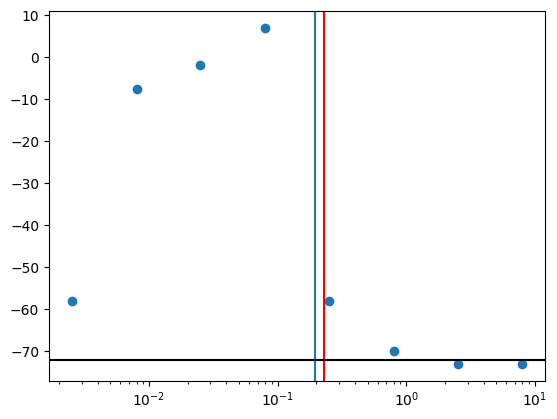

In [7]:
xvals = [float(x) for x in raw_df.loc[0,"Doses (uM)"].split(',')]
yvals = [float(x) for x in raw_df.loc[0,"Activity Data (median)"].split(',')]# - raw_df.loc[0,"Amax"]
plt.scatter(xvals, yvals)
plt.xscale('log')
plt.axvline(raw_df.loc[0,"EC50 (µM)"])
plt.axvline(raw_df.loc[0,"IC50 (µM)"], color="red")
plt.axhline(raw_df.loc[0, "Amax"], color="k")

## Prepare data

In [8]:
def explode_to_long(raw_df):
    raw_df['Doses (uM)'] = raw_df['Doses (uM)'].str.split(',')
    raw_df['Activity Data (median)'] = raw_df['Activity Data (median)'].str.split(',')
    raw_df['Activity SD'] = raw_df['Activity SD'].str.split(',')
    
    raw_df = raw_df.explode(['Doses (uM)', 'Activity Data (median)', "Activity SD"], ignore_index=True)
    
    raw_df['Doses (uM)'] = raw_df['Doses (uM)'].astype(float)
    raw_df['Activity Data (median)'] = raw_df['Activity Data (median)'].astype(float)
    raw_df['Activity SD'] = raw_df['Activity SD'].astype(float)
    return raw_df

# transfroms [0, -100] to [1,0] for curvecurator processing
def transform_activity_range(raw_df):
    raw_df["Activity Data (median)"] = raw_df["Activity Data (median)"] / 100 + 1
    raw_df["Amax"] = raw_df["Amax"] / 100 + 1



In [9]:
raw_df = explode_to_long(raw_df)
transform_activity_range(raw_df)
raw_df["Primary Cell Line Name"] = raw_df["Primary Cell Line Name"].astype(str)


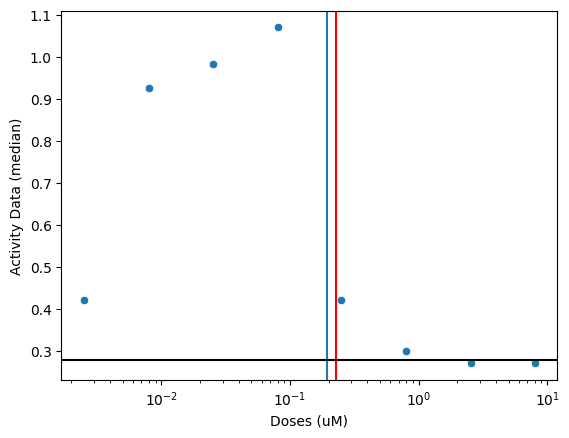

In [10]:
sns.scatterplot(raw_df.iloc[:8], x="Doses (uM)", y="Activity Data (median)")
plt.xscale('log')
plt.axvline(raw_df.loc[0,"EC50 (µM)"])
plt.axvline(raw_df.loc[0,"IC50 (µM)"], color="red")
plt.axhline(raw_df.loc[0, "Amax"], color="k")

In [11]:
# fix drug names in drug_df that cannot map to raw_df
drug_df.merge(raw_df[['Compound']].drop_duplicates(), left_on=["Compound (code or generic name)"], right_on='Compound', how='outer')

,Compound (code or generic name),Compound (brand name),Target(s),Mechanism of action,Class,Highest Phase,Organization,Compound
0,Erlotinib,Tarceva,EGFR,EGFR Inhibitor,Kinase inhibitor,Launched-2004,Genentech,Erlotinib
1,Lapatinib,Tykerb,"EGFR, HER2",EGFR and HER2 Inhibitor,Kinase inhibitor,Launched-2007,GlaxoSmithKline,Lapatinib
2,PHA-665752,NaN,c-MET,c-MET Inhibitor,Kinase inhibitor,Preclinical,Pfizer,PHA-665752
3,PF-2341066,Crizotinib,"c-MET, ALK",c-MET and ALK Inhibitor,Kinase inhibitor,Launched-2011,Pfizer,NaN
4,TAE684,NaN,ALK,ALK Inhibitor,Kinase inhibitor,Preclinical,Novartis,TAE684
5,Vandetanib,Zactima,"Abl, EGFR, Flt3, C-KIT, RET, VEGFR-1, KDR, FLT4",Multi-kinase inhibitor,Kinase inhibitor,Launched-2011,AstraZeneca,NaN
6,Nilotinib,Tasigna,Abl/Bcr-Abl,Abl Inhibitor,Kinase inhibitor,Launched-2007,Novartis,Nilotinib
7,AZD0530,Saracatinib,"Src, Abl/Bcr-Abl, EGFR",Src and Abl inhibitor,Kinase inhibitor,Phase II,AstraZeneca,AZD0530
8,Sorafenib,Nexavar,"Flt3, C-KIT, PDGFRbeta, RET, Raf kinase B, Raf...",Multi-kinase inhibitor,Kinase inhibitor,Launched-2005,Bayer,Sorafenib
9,TKI258,Dovitinib,"EGFR, FGFR1, PDGFRbeta, VEGFR-1, KDR",Multi-kinase inhibitor,Kinase inhibitor,Phase III,Novartis,TKI258


In [12]:
drug_df.iloc[10,0], drug_df.iloc[20,0]

('PD-0332991 ', 'Panobinostat\xa0\xa0')

In [13]:
# remove trailing characters
drug_df.iloc[10,0] = "PD-0332991"
drug_df.iloc[20,0] = "Panobinostat"

In [213]:
# fix the names in the raw_df
raw_df.loc[raw_df["Compound"] == 'ZD-6474', "Compound"] = "Vandetanib"
raw_df.loc[raw_df["Compound"] == 'PF2341066', "Compound"] = "PF-2341066"

In [214]:
filtered_ccle_drugs = drug_df.merge(raw_df[['Compound']].drop_duplicates(), left_on=["Compound (code or generic name)"], right_on='Compound', how='inner').set_index("Compound (code or generic name)")
filtered_ccle_drugs["Compound (brand name)"].fillna('', inplace=True)
filtered_ccle_drugs

,Compound (brand name),Target(s),Mechanism of action,Class,Highest Phase,Organization,Compound
Compound (code or generic name),,,,,,,
Erlotinib,Tarceva,EGFR,EGFR Inhibitor,Kinase inhibitor,Launched-2004,Genentech,Erlotinib
Lapatinib,Tykerb,"EGFR, HER2",EGFR and HER2 Inhibitor,Kinase inhibitor,Launched-2007,GlaxoSmithKline,Lapatinib
PHA-665752,,c-MET,c-MET Inhibitor,Kinase inhibitor,Preclinical,Pfizer,PHA-665752
PF-2341066,Crizotinib,"c-MET, ALK",c-MET and ALK Inhibitor,Kinase inhibitor,Launched-2011,Pfizer,PF-2341066
TAE684,,ALK,ALK Inhibitor,Kinase inhibitor,Preclinical,Novartis,TAE684
Vandetanib,Zactima,"Abl, EGFR, Flt3, C-KIT, RET, VEGFR-1, KDR, FLT4",Multi-kinase inhibitor,Kinase inhibitor,Launched-2011,AstraZeneca,Vandetanib
Nilotinib,Tasigna,Abl/Bcr-Abl,Abl Inhibitor,Kinase inhibitor,Launched-2007,Novartis,Nilotinib
AZD0530,Saracatinib,"Src, Abl/Bcr-Abl, EGFR",Src and Abl inhibitor,Kinase inhibitor,Phase II,AstraZeneca,AZD0530
Sorafenib,Nexavar,"Flt3, C-KIT, PDGFRbeta, RET, Raf kinase B, Raf...",Multi-kinase inhibitor,Kinase inhibitor,Launched-2005,Bayer,Sorafenib


### Cell line mapping

In [215]:
cellline_df["Cell line primary name"] = cellline_df["Cell line primary name"].astype(str).fillna("")
cellline_df["Cell line aliases"] = cellline_df["Cell line primary name"].astype(str).fillna("")

ccle_cellline_df = raw_df[['Primary Cell Line Name', "CCLE Cell Line Name"]].drop_duplicates()
ccle_cellline_df = ccle_cellline_df.merge(cellline_df, left_on="CCLE Cell Line Name", right_on="CCLE name", how="left")  # some cannot be mapped
ccle_cellline_df

,Primary Cell Line Name,CCLE Cell Line Name,CCLE name,Cell line primary name,Cell line aliases,Gender,Site Primary,Histology,Hist Subtype1,CCLE tumor type,CCLE tumor type 2,Notes,Source,Expression arrays,SNP arrays,Hybrid capture/Sequencing,OncoMap,Drug sensitivity profiling
0,1321N1,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,1321N1,NaN,central_nervous_system,glioma,astrocytoma,glioma,solid,"Identical lines: U-118 MG, U-138 MG and 1321N1...",ECACC,1.0,1.0,NaN,1.0,1.0
1,22Rv1,22RV1_PROSTATE,22RV1_PROSTATE,22Rv1,22Rv1,M,prostate,carcinoma,NaN,prostate,solid,NaN,ATCC,1.0,1.0,1.0,1.0,1.0
2,42-MG-BA,42MGBA_CENTRAL_NERVOUS_SYSTEM,42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,42-MG-BA,M,central_nervous_system,glioma,astrocytoma_Grade_IV,glioma,solid,NaN,DSMZ,1.0,1.0,1.0,1.0,1.0
3,5637,5637_URINARY_TRACT,5637_URINARY_TRACT,5637,5637,M,urinary_tract,carcinoma,NaN,urinary_tract,solid,NaN,ATCC,1.0,1.0,1.0,1.0,1.0
4,639-V,639V_URINARY_TRACT,639V_URINARY_TRACT,639-V,639-V,M,urinary_tract,carcinoma,transitional_cell_carcinoma,urinary_tract,solid,NaN,DSMZ,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,WM-983B,WM983B_SKIN,WM983B_SKIN,WM-983B,WM-983B,NaN,skin,malignant_melanoma,NaN,melanoma,solid,NaN,Academic Lab,1.0,1.0,1.0,1.0,1.0
500,YKG1,YKG1_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,YKG1,YKG1,F,central_nervous_system,glioma,astrocytoma_Grade_IV,glioma,solid,NaN,HSRRB,1.0,1.0,1.0,1.0,1.0
501,ZR-75-1,ZR751_BREAST,ZR751_BREAST,ZR-75-1,ZR-75-1,F,breast,carcinoma,ductal_carcinoma,breast,solid,Identical lines: ZR-75-1 and YMB-1 share high ...,ATCC,1.0,1.0,1.0,1.0,1.0
502,ZR-75-30,ZR7530_BREAST,ZR7530_BREAST,ZR-75-30,ZR-75-30,F,breast,carcinoma,ductal_carcinoma,breast,solid,NaN,ATCC,1.0,1.0,1.0,1.0,1.0


In [216]:
# some cannot be mapped
ccle_cellline_df[ccle_cellline_df["CCLE name"].isna()]

,Primary Cell Line Name,CCLE Cell Line Name,CCLE name,Cell line primary name,Cell line aliases,Gender,Site Primary,Histology,Hist Subtype1,CCLE tumor type,CCLE tumor type 2,Notes,Source,Expression arrays,SNP arrays,Hybrid capture/Sequencing,OncoMap,Drug sensitivity profiling
20,ALL-SIL,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,BGC-823,BGC823_STOMACH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,COLO 201,COLO201_LARGE_INTESTINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,COLO-677,COLO677_LUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,DOV13,DOV13_OVARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,GLC-82,GLC82_LUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,HMC-1-8,HMC18_BREAST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,KARPAS-422,KARPAS422_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,KP-1NL,KP1NL_PANCREAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,KP-1N,KP1N_PANCREAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drugname to PubChem mapping

In [217]:
results = {}
chembls = {}
manual_review = {}
inchis = {}
i = 0
for brd, vals in filtered_ccle_drugs.iterrows():
    if i % 10 == 0:
        print(i, '/', len(filtered_ccle_drugs))
   
    compounds = pcp.get_compounds(identifier=brd, namespace="name")
    if len(compounds) == 0:
        if vals["Compound (brand name)"]:
            syns = vals["Compound (brand name)"].split(', ')
            syncompounds = []
            for syn in syns:
                syncompounds.extend(pcp.get_compounds(identifier=brd, namespace="name"))
            if len(syncompounds) > 0:
                manual_review[brd] = syncompounds
            else:
                manual_review[brd] = [compounds]
        else:
            manual_review[brd] = [compounds]
    else:
        results[brd] = compounds[0].cid
        #print(dir(compounds[0]))
        inchis = compounds[0].inchi
        chembl = None
        for syn in compounds[0].synonyms or []:
            if syn.startswith("CHEMBL"):
                chembl = syn
                break
        chembls[brd] = chembl
    i += 1

0 / 24
10 / 24
20 / 24


### Checking results

In [218]:
len(results), len(manual_review)

(24, 0)

In [219]:
manual_review |= {brd: cid for brd, cid in results.items() if cid is None}
manual_review

{}

In [220]:
# convert integer CIDs to strings, and in case of multitreatment the list to a comma separated string
def sanitize(val):
    if isinstance(val, int):
        return str(val)
    if isinstance(val, list):
        return ','.join([str(i) for i in val])
    return val

cids = pd.Series(results | manual_review, name="CID").apply(sanitize).astype(str)
cids

Erlotinib          176870
Lapatinib          208908
PHA-665752       10461815
PF-2341066       11626560
TAE684           16038120
Vandetanib        3081361
Nilotinib          644241
AZD0530          10302451
Sorafenib          216239
TKI258          135398510
PD-0332991        5330286
AEW541           11476171
RAF265           11656518
PLX4720          24180719
PD-0325901        9826528
AZD6244          10127622
Nutlin-3           216345
LBW242           11503417
17-AAG            6505803
L-685458          5479543
Panobinostat      6918837
Paclitaxel          36314
Irinotecan          60838
Topotecan           60700
Name: CID, dtype: object

## Cell line name to Cellosaurus Mapping

In [221]:
# Download Cellosaurus data in OBO format
url = "ftp://ftp.expasy.org/databases/cellosaurus/cellosaurus.txt"
filename = "cellosaurus.txt"
urllib.request.urlretrieve(url, filename)

In [222]:
cl_mappings = {}
btos = {}
with open(filename) as handle:
    records = cellosaurus.parse(handle)
    for record in records:
        if 'Homo sapiens' in record['OX'][0]:
            if record["ID"] not in cl_mappings:
                cl_mappings[record["ID"]] = []
            cl_mappings[record["ID"]].append(record["AC"])
            syns = record["SY"].split("; ")
            for syn in syns:
                if syn == '':
                    continue
                if syn not in cl_mappings:
                    cl_mappings[syn] = []
                cl_mappings[syn].append(record["AC"])
            for a, b in record["DR"]:
                if a == 'BTO':
                    if record["AC"] not in btos:
                        btos[record["AC"]] = []
                    btos[record["AC"]].append(b)

In [229]:
ccls = ccle_cellline_df["Primary Cell Line Name"].unique()
mappings = {}
manual_checks = {}
for ccl in ccls:
    cellosaurus_ids = cl_mappings.get(ccl, [])
    if len(cellosaurus_ids) == 1:
        mappings[ccl] = cellosaurus_ids[0]
    else:
        manual_checks[ccl] = cellosaurus_ids

In [230]:
print("CCLs:", len(ccls), "matches:", len(mappings), "ambiguous:", len(manual_checks))

CCLs: 504 matches: 496 ambiguous: 8


In [231]:
manual_checks

{'697': ['CVCL_0079', 'CVCL_8056'],
 'ES-2': ['CVCL_3509', 'CVCL_AX39', 'CVCL_C769'],
 'H4': ['CVCL_6C19', 'CVCL_1239', 'CVCL_HA56'],
 'HARA': [],
 'HH': [],
 'KG-1': ['CVCL_0374', 'CVCL_2971'],
 'PC-3': ['CVCL_4011', 'CVCL_0035', 'CVCL_S982'],
 'U-87 MG': ['CVCL_0022', 'CVCL_GP63']}

In [232]:
manual_checks['697'] = 'CVCL_0079'  # this is 697, according to information on cellosaurus

manual_checks["ES-2"] = 'CVCL_3509'  # this is ES-2, according to information on cellosaurus
manual_checks["H4"] = 'CVCL_1239'  # this is H-4, according to information on cellosaurus
manual_checks["HARA"] = 'CVCL_2914'  # this is HARA [Human squamous cell lung carcinoma], according to information on cellosaurus
manual_checks["HH"] = 'CVCL_1280'    # this is HH [Human Lymphoma], according to information on cellosaurus
manual_checks["KG-1"] = 'CVCL_0374'  # this is KG-1, according to information on cellosaurus

manual_checks["PC-3"] = 'CVCL_0035'  # this is PC-3, according to information on cellosaurus
manual_checks["U-87 MG"] = 'CVCL_0022'  # this is U-87MG ATCC, according to information on cellosaurus



In [233]:
rev_mapping = {}
for key, val in (mappings | manual_checks).items():
    if val not in rev_mapping:
        rev_mapping[val] = []
    rev_mapping[val].append(key)

In [234]:
any([len(val) != 1 for val in rev_mapping.values()])

True

In [236]:
for key, val in rev_mapping.items():
    if len(val) != 1:
        print(key, val)

CVCL_0618 ['MB 157', 'MDA-MB-157']


In [244]:
raw_df[raw_df["Primary Cell Line Name"].str.startswith("MB")][['CCLE Cell Line Name', 'Primary Cell Line Name']].drop_duplicates()

,CCLE Cell Line Name,Primary Cell Line Name
2022,MB157_BREAST,MB 157


In [245]:
raw_df[raw_df["Primary Cell Line Name"].str.startswith("MDA-MB")][['CCLE Cell Line Name', 'Primary Cell Line Name']].drop_duplicates()

,CCLE Cell Line Name,Primary Cell Line Name
2054,MDAMB157_BREAST,MDA-MB-157
2062,MDAMB175VII_BREAST,MDA-MB-175-VII
2070,MDAMB415_BREAST,MDA-MB-415
2078,MDAMB435S_SKIN,MDA-MB-435S
2086,MDAMB436_BREAST,MDA-MB-436
2094,MDAMB453_BREAST,MDA-MB-453
2102,MDAMB468_BREAST,MDA-MB-468


In [249]:
cellline_df[cellline_df["Cell line primary name"].str.startswith("MDA-MB-157")].Notes.values

array(['Identical lines: MB 157 and MDA-MB-157 share high SNP identity'],
      dtype=object)

To resolve the problem with the duplicate entry, the cell line MB  157 will receive a  '_CCLE' tag in its CVCL identifier.

In [251]:
manual_checks["MB 157"] = "CVCL_0618_CCLE"
manual_checks["MDA-MB-157"] = "CVCL_0618"

In [252]:
rev_mapping = {}
for key, val in (mappings | manual_checks).items():
    if val not in rev_mapping:
        rev_mapping[val] = []
    rev_mapping[val].append(key)

In [254]:
any([len(val) != 1 for val in rev_mapping.values()])

False

In [255]:
len(rev_mapping)

504

In [256]:
mappings |= manual_checks

In [257]:
celline_mappings = pd.DataFrame.from_dict(mappings, orient='index')
celline_mappings.columns = ['CVCL']
btos_df = pd.DataFrame({'BTO': btos.values()}, index=btos.keys())

In [267]:
btos_df

,BTO
CVCL_IP58,[BTO:0006002]
CVCL_IP59,[BTO:0006003]
CVCL_L211,[BTO:0005352]
CVCL_5948,[BTO:0002603]
CVCL_8030,[BTO:0002947]
...,...
CVCL_6746,[BTO:0003554]
CVCL_WY40,[BTO:0006281]
CVCL_5906,[BTO:0003992]
CVCL_0588,[BTO:0003136]


In [268]:
# filter relevant and check for more than one BTO mapping
cvcl_to_bto = celline_mappings.merge(btos_df, left_on='CVCL', right_index=True, how='left')#[:220]
cvcl_to_bto.query("BTO.str.len()>1")

,CVCL,BTO
SW480,CVCL_0546,"[BTO:0000038, BTO:0006552]"


In [269]:
# choose BTO:0000038 since the other one refers to SWH80, which is a misspelling of SW-480, according to the entry CVCL_0546 in cellosaurus
cvcl_to_bto.loc["SW480", "BTO"] = ['BTO:0000038']
cvcl_to_bto.query("BTO.str.len()>1")

,CVCL,BTO


In [270]:
cvcl_to_bto['BTO'] = cvcl_to_bto.BTO.transform(lambda x: '' if pd.isna(x) else x[0])
cvcl_to_bto

,CVCL,BTO
1321N1,CVCL_0110,BTO:0003605
22Rv1,CVCL_1045,BTO:0002999
42-MG-BA,CVCL_1798,
5637,CVCL_0126,BTO:0003137
639-V,CVCL_1048,
...,...,...
HARA,CVCL_2914,
HH,CVCL_1280,
KG-1,CVCL_0374,BTO:0000670
PC-3,CVCL_0035,BTO:0001061


## Bringing viability, drug, and cell line mappings together

In [274]:
full_df = raw_df.merge(cids, left_on='Compound', right_index=True).merge(cvcl_to_bto, left_on='Primary Cell Line Name', right_index=True)
full_df

,CCLE Cell Line Name,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (µM),IC50 (µM),Amax,ActArea,CID,CVCL,BTO
0,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,17-AAG,HSP90,0.0025,0.4200,43.30,8,Sigmoid,0.193677,0.228078,0.278762,3.0302,6505803,CVCL_0110,BTO:0003605
1,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,17-AAG,HSP90,0.0080,0.9250,11.50,8,Sigmoid,0.193677,0.228078,0.278762,3.0302,6505803,CVCL_0110,BTO:0003605
2,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,17-AAG,HSP90,0.0250,0.9830,3.65,8,Sigmoid,0.193677,0.228078,0.278762,3.0302,6505803,CVCL_0110,BTO:0003605
3,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,17-AAG,HSP90,0.0800,1.0704,2.85,8,Sigmoid,0.193677,0.228078,0.278762,3.0302,6505803,CVCL_0110,BTO:0003605
4,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,17-AAG,HSP90,0.2500,0.4200,0.28,8,Sigmoid,0.193677,0.228078,0.278762,3.0302,6505803,CVCL_0110,BTO:0003605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90186,HCC56_LARGE_INTESTINE,HCC-56,Vandetanib,EGFR,0.0800,0.9917,3.07,8,Sigmoid,0.716957,8.000000,0.620758,0.7121,3081361,CVCL_2917,
90187,HCC56_LARGE_INTESTINE,HCC-56,Vandetanib,EGFR,0.2500,0.9700,9.53,8,Sigmoid,0.716957,8.000000,0.620758,0.7121,3081361,CVCL_2917,
90188,HCC56_LARGE_INTESTINE,HCC-56,Vandetanib,EGFR,0.8000,0.7400,12.40,8,Sigmoid,0.716957,8.000000,0.620758,0.7121,3081361,CVCL_2917,
90189,HCC56_LARGE_INTESTINE,HCC-56,Vandetanib,EGFR,2.5300,0.7600,11.90,8,Sigmoid,0.716957,8.000000,0.620758,0.7121,3081361,CVCL_2917,


In [275]:
len(full_df.Compound.unique())

24

In [276]:
len(full_df.CID.unique())

24

ensure there are no duplicates remaining that cause problems when pivoting the dataframe for curvecurator input creation

In [279]:
full_df[full_df[["Compound", "Primary Cell Line Name", "Doses (uM)"]].duplicated(keep=False)][["Compound", "Primary Cell Line Name", "Doses (uM)"]]

,Compound,Primary Cell Line Name,Doses (uM)


rename columns for use in CurveCurator and save.

In [282]:
full_df.rename(columns={"Doses (uM)": "dose", "Activity Data (median)": "response", "CVCL": "sample", "CID": "drug"}, inplace=True)
full_df.to_csv("viabilities_processed.csv", index=None)

In [283]:
preprocess(input_file="viabilities_processed.csv", output_dir='curvecurator', dataset_name="CCLE", cores=100)

# Prepare for DrEvalPy

## Run CurveCurator

In [2]:
_exec_curvecurator(Path("curvecurator"))

In [3]:
postprocess("curvecurator", dataset_name="CCLE")

## Combine curvecurator output with original measures from publication

In [70]:
# load the curvecurator output
viability_df = pd.read_csv("curvecurator/CCLE.csv", converters={"cell_line_id": str, "drug_id": str})

# load the processed viabilities from 00_preprocess_raw_for_curvecurator.ipynb
mapping_df = pd.read_csv("viabilities_processed.csv", converters={"Primary Cell Line Name": str, "Compound": str, "sample": str, "drug": str})[["Primary Cell Line Name", "Compound", "sample", "drug"]].drop_duplicates()

# merge based on cell_line_id, drug_id to get drug name and cell line name back
viability_df = viability_df.merge(mapping_df, left_on=["cell_line_id", "drug_id"], right_on=["sample", "drug"])
viability_df["Compound"] = viability_df["Compound"].str.strip()
viability_df["Primary Cell Line Name"] = viability_df["Primary Cell Line Name"].str.strip()
viability_df

,Name,SignalQuality,pEC50_curvecurator,Slope,Front,Back,FoldChange,AUC_curvecurator,RMSE,R2,...,RelevanceScore,Regulation,cell_line_id,drug_id,EC50_curvecurator,IC50_curvecurator,Primary Cell Line Name,Compound,sample,drug
0,CVCL_0031|11656518,0.0,6.380385,3.812538,1.085608,0.767838,-0.380512,1.002747,0.079078,0.730258,...,0.315271,NaN,CVCL_0031,11656518,4.164999e-07,NaN,MCF7,RAF265,CVCL_0031,11656518
1,CVCL_0069|24180719,0.0,3.596879,0.682323,0.944934,6.483646,0.231717,0.994082,0.083130,0.445913,...,0.043004,NaN,CVCL_0069,24180719,2.530000e-04,NaN,SK-MEL-2,PLX4720,CVCL_0069,24180719
2,CVCL_0007|10127622,0.0,5.381694,1.694135,0.922372,0.613620,-0.535126,0.890860,0.036605,0.804497,...,0.603458,not,CVCL_0007,10127622,4.152467e-06,NaN,U-937,AZD6244,CVCL_0007,10127622
3,CVCL_0007|10302451,0.0,8.347859,10.000000,0.945071,1.006109,0.008787,1.001681,0.063080,0.138848,...,-0.000000,not,CVCL_0007,10302451,4.488910e-09,NaN,U-937,AZD0530,CVCL_0007,10302451
4,CVCL_0007|10461815,0.0,5.117873,2.075958,1.015333,0.000100,-1.051984,0.970221,0.065419,0.865978,...,1.260381,NaN,CVCL_0007,10461815,7.623013e-06,7.735483e-06,U-937,PHA-665752,CVCL_0007,10461815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,CVCL_1347|24180719,0.0,5.169925,1.141174,0.981017,0.000100,-1.172495,0.862998,0.034680,0.966734,...,1.623433,down,CVCL_1347,24180719,6.762005e-06,6.537647e-06,KYSE-140,PLX4720,CVCL_1347,24180719
11666,CVCL_1347|3081361,0.0,5.951310,1.963708,1.025005,0.187985,-2.284892,0.738040,0.031100,0.991081,...,2.549042,down,CVCL_1347,3081361,1.118638e-06,1.458050e-06,KYSE-140,Vandetanib,CVCL_1347,3081361
11667,CVCL_1347|36314,0.0,9.602060,10.000000,1.000000,0.345000,-1.535332,0.345000,0.036936,0.974688,...,1.898179,down,CVCL_1347,36314,2.500000e-10,2.810631e-10,KYSE-140,Paclitaxel,CVCL_1347,36314
11668,CVCL_1347|60700,0.0,6.676038,0.805015,1.029543,0.222603,-1.923467,0.540538,0.065302,0.946601,...,1.694064,down,CVCL_1347,60700,2.108445e-07,4.707337e-07,KYSE-140,Topotecan,CVCL_1347,60700


In [109]:
# load the original data
orig_measures_df = pd.read_excel("raw/NIHMS361223-supplement-4.xlsx", sheet_name=11, skiprows=2, converters={"Primary Cell Line Name": str, "Compound": str, "IC50 (µM)": float, 'EC50 (µM)': float, "ActArea": float})
orig_measures_df["IC50"] = orig_measures_df["IC50 (µM)"] / 1e6  # original one is in µM, but we need it in M. 
orig_measures_df["EC50"] = orig_measures_df["EC50 (µM)"] / 1e6  # original one is in µM, but we need it in M. , for some reason one needs to convert to float again...
orig_measures_df["AUC"] = -orig_measures_df["ActArea"] / 8 + 1  # original ActivityArea is calculated as sum(percentage_activity_x for x in doses), so max is 8 with 8 doses but we want to scale to [0,1] 

orig_measures_df["Compound"] = orig_measures_df["Compound"].str.strip()
orig_measures_df["Primary Cell Line Name"] = orig_measures_df["Primary Cell Line Name"].str.strip()

# fix the names as done in 00_preprocess_raw_for_curvecurator.ipynb
orig_measures_df.loc[orig_measures_df["Compound"] == 'ZD-6474', "Compound"] = "Vandetanib"
orig_measures_df.loc[orig_measures_df["Compound"] == 'PF2341066', "Compound"] = "PF-2341066"

In [110]:
# merge curvecurator and original fits
mapped_response_df = viability_df.merge(orig_measures_df, on=["Compound", "Primary Cell Line Name"])
mapped_response_df

,Name,SignalQuality,pEC50_curvecurator,Slope,Front,Back,FoldChange,AUC_curvecurator,RMSE,R2,...,Activity SD,Num Data,FitType,EC50 (µM),IC50 (µM),Amax,ActArea,IC50,EC50,AUC
0,CVCL_0031|11656518,0.0,6.380385,3.812538,1.085608,0.767838,-0.380512,1.002747,0.079078,0.730258,...,"27.3,5.81,21.4,35.4,12.9,7.66,23.6",7,Constant,NaN,2.531646,-0.857280,0.01511,2.531646e-06,NaN,0.998111
1,CVCL_0069|24180719,0.0,3.596879,0.682323,0.944934,6.483646,0.231717,0.994082,0.083130,0.445913,...,"2.39,13.5,.62,21.0,.72,8.04,10.3",7,Linear,NaN,2.531646,-21.457716,0.44250,2.531646e-06,NaN,0.944688
2,CVCL_0007|10127622,0.0,5.381694,1.694135,0.922372,0.613620,-0.535126,0.890860,0.036605,0.804497,...,"10.8,9.17,8.78,1.80,15.7,10.0,22.1,16.1",8,Sigmoid,2.234367,8.000000,-41.782055,1.14030,8.000000e-06,0.000002,0.857463
3,CVCL_0007|10302451,0.0,8.347859,10.000000,0.945071,1.006109,0.008787,1.001681,0.063080,0.138848,...,"12.5,2.32,11.8,3.55,10.4,18.5,16.9,22.6",8,Linear,NaN,8.000000,-22.127462,0.57930,8.000000e-06,NaN,0.927588
4,CVCL_0007|10461815,0.0,5.117873,2.075958,1.015333,0.000100,-1.051984,0.970221,0.065419,0.865978,...,"8.83,8.04,9.68,8.02,9.98,9.10,12.7,46.5",8,Sigmoid,8.31647,8.000000,-38.214069,0.77960,8.000000e-06,0.000008,0.902550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,CVCL_1347|24180719,0.0,5.169925,1.141174,0.981017,0.000100,-1.172495,0.862998,0.034680,0.966734,...,"4.39,14.8,24.2,6.14,.68,5.12",6,Sigmoid,8.634032,6.805239,-56.326820,0.41870,6.805239e-06,0.000009,0.947662
11666,CVCL_1347|3081361,0.0,5.951310,1.963708,1.025005,0.187985,-2.284892,0.738040,0.031100,0.991081,...,"3.93,8.23,6.62,1.49,5.13,3.00",6,Sigmoid,1.104251,1.448931,-79.231400,1.28400,1.448931e-06,0.000001,0.839500
11667,CVCL_1347|36314,0.0,9.602060,10.000000,1.000000,0.345000,-1.535332,0.345000,0.036936,0.974688,...,"2.30,9.95,3.09,8.22,4.38,7.06",6,Constant,NaN,0.025390,-65.860992,3.53970,2.538952e-08,NaN,0.557538
11668,CVCL_1347|60700,0.0,6.676038,0.805015,1.029543,0.222603,-1.923467,0.540538,0.065302,0.946601,...,"7.10,1.49,12.2,4.07,11.4,2.24",6,Linear,NaN,1.071993,-77.443932,2.39750,1.071993e-06,NaN,0.700313


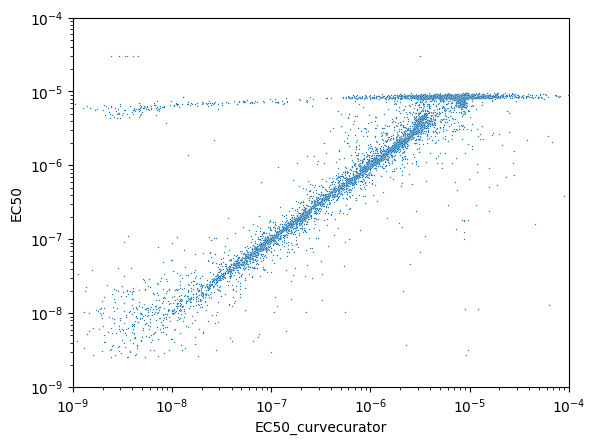

In [120]:
sns.scatterplot(mapped_response_df, x="EC50_curvecurator", y="EC50", s=1)
plt.xlim(1e-9,1e-4)
plt.ylim(1e-9,1e-4)

plt.xscale('log')
plt.yscale('log')

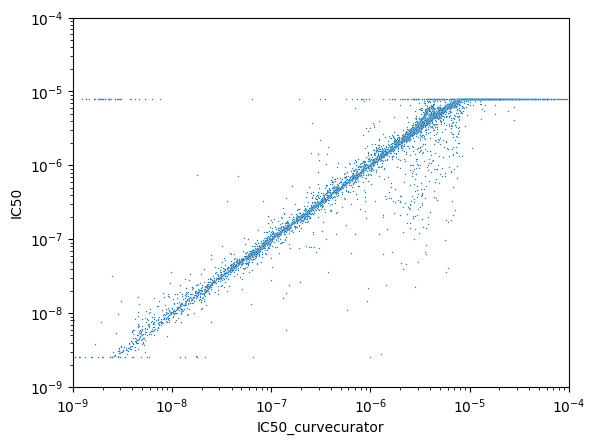

In [119]:
sns.scatterplot(mapped_response_df, x="IC50_curvecurator", y="IC50", s=1)
plt.xlim(1e-9,1e-4)
plt.ylim(1e-9,1e-4)

plt.xscale('log')
plt.yscale('log')

<Axes: xlabel='AUC_curvecurator', ylabel='AUC'>

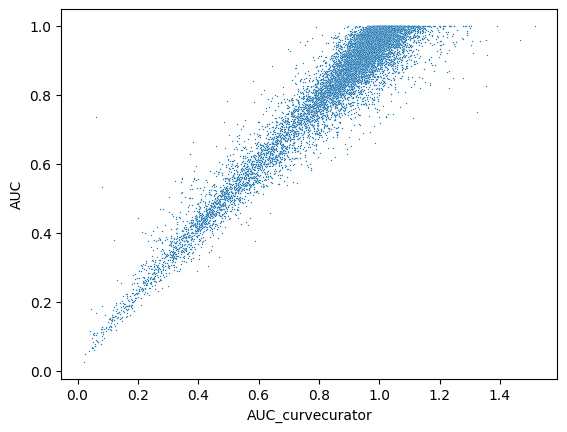

In [112]:
sns.scatterplot(mapped_response_df, x="AUC_curvecurator", y="AUC", s=1)
#plt.xlim(1e-9,1e-0)
#plt.ylim(1e-9,1e-0)

#plt.xscale('log')
#plt.yscale('log')

In [126]:
mapped_response_df.query("IC50_curvecurator<3*1e-9").query("IC50 > 1e-6")

,Name,SignalQuality,pEC50_curvecurator,Slope,Front,Back,FoldChange,AUC_curvecurator,RMSE,R2,...,Activity SD,Num Data,FitType,EC50 (µM),IC50 (µM),Amax,ActArea,IC50,EC50,AUC
207,CVCL_0031|36314,0.0,9.353200,0.570348,0.997983,0.014835,-5.756730,0.081727,0.115612,0.868005,...,"4.19,6.21,7.29,23.8,1.69,19.4,21.3,13.7",8,Sigmoid,0.018154,8.0,-98.355804,3.7399,0.000008,0.0,0.532512
414,CVCL_0065|36314,0.0,8.797697,1.005055,0.999871,0.021655,-5.516799,0.080985,0.004693,0.999765,...,"2.00,2.18,1.16,.67,.16,.23,.78,.0025",8,Sigmoid,0.002751,8.0,-97.732346,7.2847,0.000008,0.0,0.089413
529,CVCL_0080|36314,0.0,8.545618,2.594891,1.000032,0.039271,-4.670380,0.079454,0.003975,0.999852,...,"36.7,3.12,.61,.16,1.02,.46,.25,.81",8,Sigmoid,5.060275,8.0,-96.183815,7.0239,0.000008,0.000005,0.122012
762,CVCL_0153|36314,0.0,9.055977,0.620098,1.000007,0.098289,-3.301295,0.173457,0.013050,0.997729,...,"2.26,8.71,4.55,1.22,2.98,1.42,1.22,2.87",8,Sigmoid,0.003602,8.0,-89.792152,6.7040,0.000008,0.0,0.162000
1263,CVCL_0332|36314,0.0,8.594807,0.900011,0.998208,0.026455,-5.203146,0.120097,0.018970,0.996272,...,"12.9,1.15,1.07,.68,.13,.30,1.61,1.36",8,Sigmoid,0.012234,8.0,-96.140671,6.8292,0.000008,0.0,0.146350
1492,CVCL_0379|36314,0.0,8.710209,0.946420,0.998694,0.007903,-6.916143,0.083376,0.023592,0.994335,...,"9.42,3.61,.18,.50,.24,1.27,.30,.15",8,Sigmoid,0.008656,8.0,-98.119377,7.1048,0.000008,0.0,0.111900
1607,CVCL_0419|36314,0.0,8.840593,1.211403,0.999756,0.187582,-2.414224,0.222038,0.023471,0.991544,...,"5.75,1.75,.75,2.43,6.00,4.26,2.62,3.28",8,Sigmoid,0.005765,8.0,-81.029770,6.0750,0.000008,0.0,0.240625
1703,CVCL_0434|36314,0.0,8.974938,0.753060,1.000350,0.177105,-2.489299,0.233999,0.024099,0.990994,...,"21.0,.63,1.63,1.04,1.17,7.42,1.02,3.74",8,Sigmoid,6.783455,8.0,-82.758080,5.8234,0.000008,0.000007,0.272075
1913,CVCL_0505|36314,0.0,9.048649,0.476759,0.998798,0.106670,-3.081043,0.214431,0.030718,0.986681,...,"28.4,8.06,4.40,2.78,1.24,3.80,4.22,4.11",8,Sigmoid,0.026808,8.0,-83.733665,6.0950,0.000008,0.0,0.238125
1960,CVCL_0525|36314,0.0,8.807955,0.488096,0.998511,0.126499,-2.838996,0.252408,0.039688,0.977144,...,"15.8,2.32,.37,4.31,2.54,1.00,1.03,.46",8,Sigmoid,0.038306,8.0,-83.542999,4.9680,0.000008,0.0,0.379000


(0.0, 1.5)

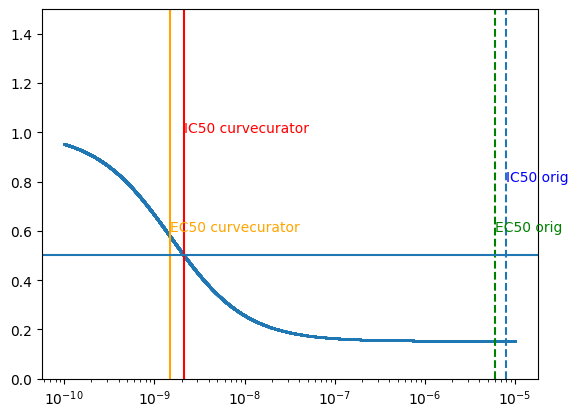

In [131]:
xvals = np.linspace(-10,-5, 10000)

index = 10302
front = mapped_response_df.loc[index, "Front"]
back = mapped_response_df.loc[index, "Back"]
pec50 = mapped_response_df.loc[index, "pEC50_curvecurator"]
ec50 = mapped_response_df.loc[index, "EC50_curvecurator"]

slope = mapped_response_df.loc[index, "Slope"]
ic50 = mapped_response_df.loc[index, "IC50_curvecurator"]
origic50 = mapped_response_df.loc[index, "IC50"]
origec50 = mapped_response_df.loc[index, "EC50"]


y = (front - back) / (1 + 10 ** (slope * (xvals + pec50))) + back
plt.scatter(10**xvals, 	y, s=1)


plt.axvline(origic50, linestyle='--')
plt.text(x=origic50, y=0.8, s='IC50 orig', color='blue')

plt.axvline(ic50, color="red")
plt.text(x=ic50, y=1.0, s='IC50 curvecurator', color='red')

plt.axvline(ec50, color="orange")
plt.text(x=ec50, y=0.6, s='EC50 curvecurator', color='orange')

plt.axvline(origec50, color="green", linestyle='--')
plt.text(x=origec50, y=0.6, s='EC50 orig', color='green')

plt.axhline(0.5)

plt.xscale('log')
plt.ylim(0,1.5)

In [115]:
mapped_response_df.to_csv("CCLE_for_drevalpy.csv")